In [18]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.common.by import By

- 1 셀레니움으로 서울시 구별 주유소 가격정보 얻기

In [19]:
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [20]:
# 광역시도에서 서울 입력
metro = driver.find_element(By.ID, 'SIDO_NM0')
metro.send_keys('서울')

In [21]:
# 서울시 자치구 리스트 가져오기
sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="3c82b362df1c1443e0a92389ea742c50", element="DCDE4168F6431A3A0DB7B525E12E9705_element_88")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3c82b362df1c1443e0a92389ea742c50", element="DCDE4168F6431A3A0DB7B525E12E9705_element_90")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3c82b362df1c1443e0a92389ea742c50", element="DCDE4168F6431A3A0DB7B525E12E9705_element_92")>]

In [22]:
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [23]:
gu_names = [gu.text for gu in gu_list[1:]]
gu_names[:3]

['강남구', '강동구', '강북구']

In [24]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [25]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()
time.sleep(2)

In [26]:
# 강남구를 제외한 나머지 자치구에 대해서 주유소 가격정보 엑셀 저장
for gu in gu_names[1:]:
    sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    sigungu.send_keys(gu)
    time.sleep(3)
    driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)

In [27]:
driver.close()

- 2. 구별 휘발유 가격에 대한 정리

In [28]:
from glob import glob
glob('c:/Users/human/Downloads/지역*xls')


['c:/Users/human/Downloads\\지역_위치별(주유소) (1).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (10).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (11).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (12).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (13).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (14).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (15).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (16).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (17).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (18).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (19).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (2).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (20).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (21).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (22).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (23).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (24).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (3).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (4).xls',
 'c:/Users/human/Downloads\\지역_위치별(

In [29]:
# conda activate base; pip install xlrd
filename = 'c:/Users/human/Downloads/지역_위치별(주유소).xls'
df = pd.read_excel(filename, header=2)
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1769,1668,-
1,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,2025,1795,1735,-
2,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1978,1798,1698,-


In [30]:
# 25개 파일을 읽어서 하나의 데이터프레임으로 만들기
df_list = []
for filename in glob('c:/Users/human/Downloads/지역*xls'):
    df = pd.read_excel(filename, header=2)
    df_list.append(df)

In [31]:
df = pd.concat(df_list)
df.shape

(439, 10)

In [33]:
df = df[['상호', '주소', '가격', '셀프','상표']]
#df.rename(columns={'휘발유':'가격' , '셀프여부':'셀프'}, inplace=True)
#df.head()

KeyError: "['가격', '셀프'] not in index"

In [ ]:
df.set_index('상호', inplace=True)
df.reset_index(inplace=True)
df.tail()

,상호,지역,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
460,성원이앤에스(주)영등포지점,서울특별시,서울 영등포구 국회대로52길 9-13 (영등포동7가),GS칼텍스,02-2635-7781,N,2195,2017,1915,1700
461,국회대로주유소,서울특별시,서울 영등포구 국회대로 746 (여의도동),HD현대오일뱅크,02-761-5122,N,2267,2137,1987,-
462,버드나룻길주유소,서울특별시,서울 영등포구 버드나루로 111 (당산동),SK에너지,02-2634-5104,N,2270,2155,2070,-
463,SK KH에너지 여의도주유소,서울특별시,서울 영등포구 국회대로 794 (여의도동),SK에너지,02-761-5101,N,2310,2195,2189,-
464,SJ오일(주) 여의도주유소,서울특별시,서울 영등포구 은행로 64,GS칼텍스,02-785-8201,N,2410,2260,2390,-


- 3.셀프 주유소가 정말 저렴할까?

In [ ]:
df.pivot_table('가격', '셀프', aggfunc=['count','mean','min','max','std','var'])

KeyError: '가격'

- 셀프 여부에 따른 Boxplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
sns.boxplot(df, x='셀프', y='가격')
plt.title('셀프 여부에 따른 가격의 boxplot')

ValueError: Could not interpret input '셀프'

- 가설검정(2-sample T test)

In [ ]:
import scipy as sp 
sp.stats.ttest_ind(df[df.셀프=='Y'].가격,df[df.셀프=='N'].가격, equal_var=False)

Ttest_indResult(statistic=-13.146118775735028, pvalue=4.263436086690961e-33)

In [ ]:
# p-value가 0.05보다 훨씬 작으므로 귀무가설 기각, 대립가설 체택
# - 귀무가설(H0) : 셀프주유소와 일반주유소의 가격 차이가 없다.
# - 대립가설(H1) : 셀프주유소와 일반주유소의 가격 차이가 있다.

- 상표별로 가격 비교하기

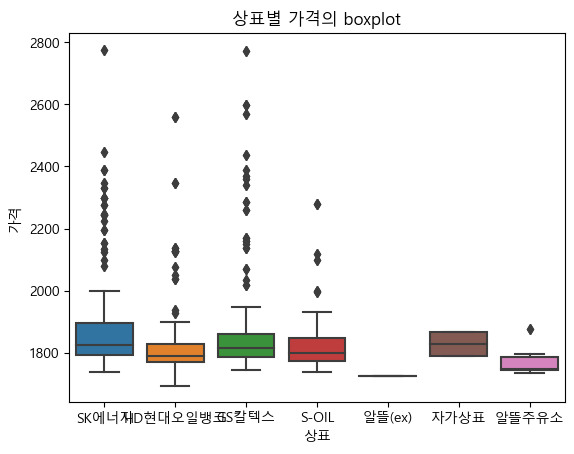

In [ ]:
sns.barplot(y=df2.index, x=df2.가격)
plt.title('상표별 평균 가격');

In [ ]:
# 구별 가격 비교
df3 = df.pivot_table('가격', '구').sort_values('가격', ascending=False)
df3.head()

NameError: name 'df' is not defined

In [ ]:
sns.barplot(y=df3.index, x=df3.가격)
plt.title('구별 평균 가격');

,가격
상표,
자가상표,1828.000000
알뜰주유소,1768.619048
알뜰(ex),1724.000000
SK에너지,1895.530466
S-OIL,1829.858896
HD현대오일뱅크,1832.821138
GS칼텍스,1896.560538


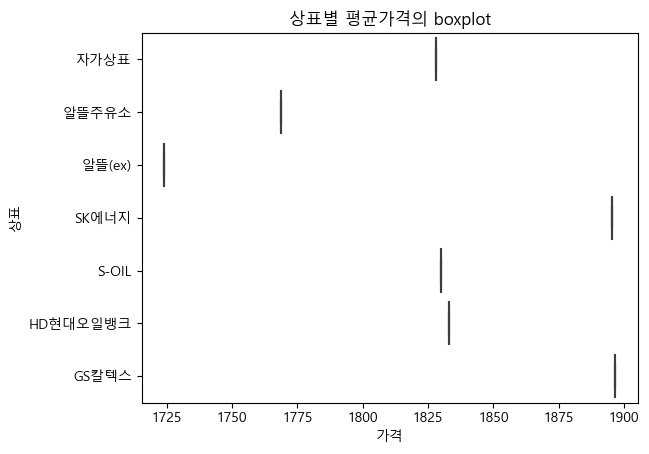

In [ ]:
sns.boxplot(data=mean.head(10), y=mean.index[:10], x='가격')
plt.title('상표별 평균가격의 boxplot');
plt.show()

<Axes: xlabel='상표'>

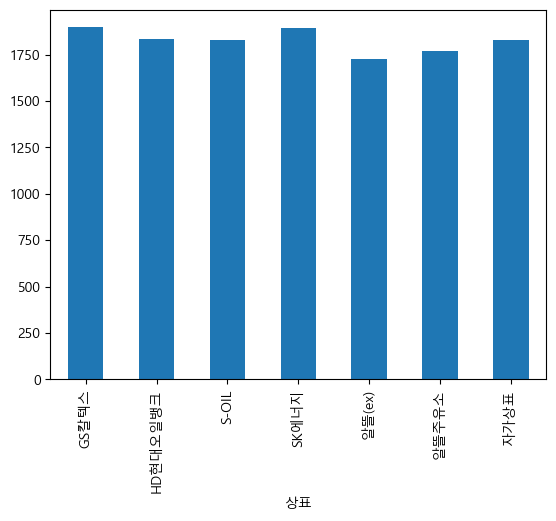

In [ ]:
g = df.groupby(["상표"])["가격"].mean()
g.plot(kind="bar")